<a href="https://colab.research.google.com/github/Anfaga/TFM-BigData-DataScience-VIU/blob/main/Selecci%C3%B3n_de_Caracter%C3%ADsticas_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Carlos Andrés Falla Gaitán - MasterTFM Máster en BigData y DataScience VIU

# Análisis para Selección de Características - Regresión Covid-19

## Carga de Librerias

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks


## Carga de Datos

In [ ]:
# 0.1 load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Base_Covid_Variables.csv to Base_Covid_Variables.csv
User uploaded file "Base_Covid_Variables.csv" with length 20356 bytes


Utilizamos la librería [Pandas](https://pandas.pydata.org/) con el fin de poder manejar los datos en una estructura de DataFrame


In [ ]:
import pandas as pd
import io
covid = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col ='fecha_caso')
covid

,Pruebas_PCR,Casos_Salud,RT,Ocupacion_Camas,Ocupacion_UCI,Ocupacion_Crematorios,Temp_Min,Temp_Max,Pasajeros_TM,Vuelos,Trafic,Hurtos,Lesiones_Personales,TRM,TIP
fecha_caso,,,,,,,,,,,,,,,
2020-03-01,0,0,1.183851,0.000000,0.000000,11.5,10.00,21.17,402450,0,0.000000,39,116,3539.86,4.25
2020-03-02,0,0,2.401324,0.000000,0.000000,9.0,9.17,21.60,935858,0,0.000000,44,59,3539.86,4.25
2020-03-03,0,0,1.704885,0.000000,0.000000,8.0,9.30,22.11,1128778,0,0.000000,71,57,3512.17,4.25
2020-03-04,0,0,1.862228,0.000000,0.000000,15.0,9.57,22.29,1103128,0,0.000000,66,66,3455.56,4.25
2020-03-05,0,0,1.988661,0.000000,0.000000,12.5,6.23,23.37,1086023,0,0.000000,71,61,3458.45,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,833284,26,0.831844,0.727411,0.763259,57.2,7.55,18.33,1333683,59,-46.255614,30,43,3846.64,2.25
2020-08-28,843028,35,0.828511,0.723669,0.746711,60.5,8.00,19.95,1401705,56,-42.140840,33,39,3820.17,2.25
2020-08-29,848917,40,0.829951,0.722477,0.731148,49.4,6.65,20.40,1175570,42,-11.038699,21,58,3760.38,2.25


In [ ]:
covid.dtypes

Pruebas_PCR                int64
Casos_Salud                int64
RT                       float64
Ocupacion_Camas          float64
Ocupacion_UCI            float64
Ocupacion_Crematorios    float64
Temp_Min                 float64
Temp_Max                 float64
Pasajeros_TM               int64
Vuelos                     int64
Trafic                   float64
Hurtos                     int64
Lesiones_Personales        int64
TRM                      float64
TIP                      float64
dtype: object

Transponemos nuestro conjunto de datos para realizar análisis sobre las características

In [ ]:
covid_feat = covid.transpose()
covid_feat


fecha_caso,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,...,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31
Pruebas_PCR,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.122090e+05,4.219810e+05,434297.000000,445686.000000,4.522310e+05,4.651120e+05,4.785160e+05,4.893080e+05,4.995790e+05,511970.000000,5.249160e+05,5.371460e+05,5.501720e+05,5.632350e+05,5.784610e+05,590578.000000,603095.000000,610994.000000,6.233720e+05,6.373650e+05,6.543590e+05,6.680580e+05,6.843730e+05,7.019050e+05,716800.000000,731713.000000,7.442580e+05,7.550050e+05,7.640240e+05,7.716280e+05,782274.000000,789932.000000,8.032570e+05,8.145750e+05,8.227520e+05,8.332840e+05,8.430280e+05,8.489170e+05,860884.000000,8.704080e+05
Casos_Salud,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,2.000000e+00,2.000000,3.000000,4.000000,7.000000e+00,6.000000e+00,5.000000e+00,8.000000e+00,5.000000,5.000000,3.000000,7.000000,5.000000e+00,8.000000,13.000000,21.000000,10.000000,12.000000,10.000000,3.000000,22.000000,11.000000,9.000000,12.000000,8.000000,12.000000,6.000000,10.000000,7.000000,...,7.400000e+01,6.400000e+01,108.000000,78.000000,1.010000e+02,8.600000e+01,8.700000e+01,8.500000e+01,9.100000e+01,111.000000,7.000000e+01,7.600000e+01,8.000000e+01,7.000000e+01,7.200000e+01,49.000000,57.000000,47.000000,5.200000e+01,3.100000e+01,4.200000e+01,3.700000e+01,3.700000e+01,3.400000e+01,38.000000,29.000000,2.900000e+01,4.000000e+01,3.300000e+01,1.600000e+01,17.000000,18.000000,2.700000e+01,4.600000e+01,3.000000e+01,2.600000e+01,3.500000e+01,4.000000e+01,29.000000,5.300000e+01
RT,1.183851,2.401324,1.704885e+00,1.862228e+00,1.988661e+00,1.815577,1.851237,1.911562,2.139527,2.244823e+00,2.289148e+00,1.964222e+00,1.876598,1.825393,1.662003,1.446643e+00,1.258122e+00,1.098546e+00,1.037199e+00,1.024581,0.976474,0.934622,0.906554,9.127670e-01,0.889548,0.995041,0.972005,0.957009,0.960081,0.956840,1.020182,1.024165,1.073524,0.996519,1.067435,1.082576,1.076632,1.048041,0.991363,1.030173,...,1.072065e+00,1.008825e+00,0.967376,0.951157,9.234368e-01,9.472180e-01,9.154155e-01,9.479486e-01,9.809232e-01,0.987801,1.015147e+00,9.728704e-01,1.007739e+00,9.839801e-01,9.472786e-01,0.873300,0.806934,0.780579,7.289258e-01,7.179985e-01,6.836692e-01,7.137706e-01,7.669366e-01,8.086534e-01,0.817910,0.813089,8.300809e-01,8.441791e-01,8.277461e-01,7.717018e-01,0.713894,0.697270,7.203913e-01,7.703167e-01,8.261849e-01,8.318437e-01,8.285112e-01,8.299508e-01,0.825020,8.177448e-01
Ocupacion_Camas,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
covid_feat.dtypes

fecha_caso
2020-03-01    float64
2020-03-02    float64
2020-03-03    float64
2020-03-04    float64
2020-03-05    float64
               ...   
2020-08-27    float64
2020-08-28    float64
2020-08-29    float64
2020-08-30    float64
2020-08-31    float64
Length: 184, dtype: object

In [ ]:
covid_feat.shape

(15, 184)

In [ ]:
names =  covid_feat.index

## Análisis de Correlación entre Características

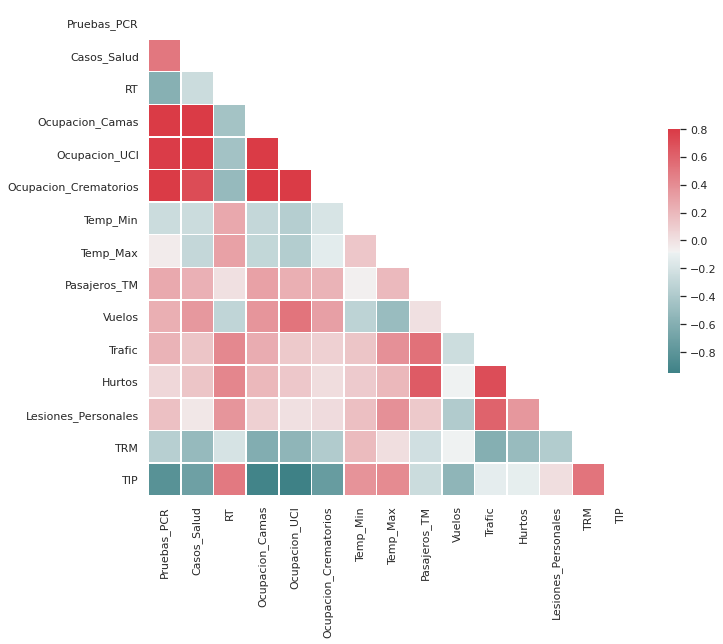

In [ ]:
R = corrcoef(covid_feat)
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Las variables están correlacionadas entre ellas, pero no demasiado (no llega a 1) esto puede hacer que las sigamos teniendo en cuenta aunque hay que ser consciente que algunas de ellas pueden ser muy parecidas.

## Análisis de componentes principales


Variance Ratio:  [0.93765854 0.06233176]


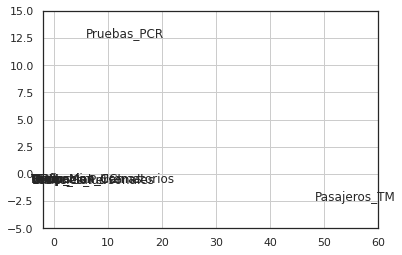

In [ ]:
# Normalización de datos
from sklearn import preprocessing 
min_max_scaler = preprocessing.StandardScaler()
features_norm = min_max_scaler.fit_transform(covid_feat)

# PAC
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 

plt.xlim(-2, 60)
plt.ylim(-5, 15)
ax.grid(True)
#fig.tight_layout()
plt.show()

El ratio de variabilidad por eje es bueno, con el eje X se representa el 94% de la variabilidad del conjunto de datos.

## Análisis por Clustering Jerárquico

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Matriz de Distancias')

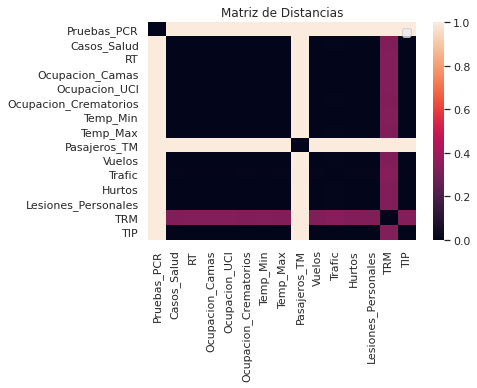

In [ ]:
# Matriz de Similaridad
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)

# Visualización
import seaborn as sns; sns.set()
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

plt.axis('tight')
plt.legend()
plt.title("Matriz de Distancias")

Al graficar la matriz de distancia podemos ver que las variables entre si, son demasiado parecidas, excepto por pasajeros_MT y Pruebas_PCR

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


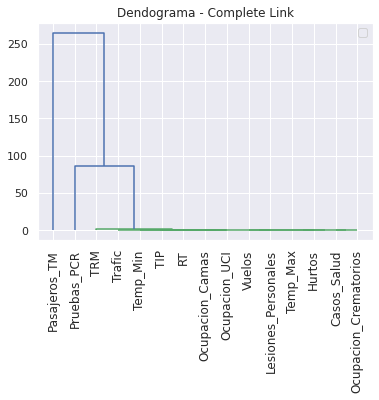

In [ ]:
# Dendograma
clusters = cluster.hierarchy.linkage(matdist, method = 'Complete')
cluster.hierarchy.dendrogram(clusters, color_threshold = 3, labels = names , leaf_rotation=90)

plt.axis('tight')
plt.legend()
plt.title("Dendograma - Complete Link")
plt.show()

Asignación a Clusters

In [ ]:
cut = 0 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([14, 10,  3,  1,  2, 11,  5,  8, 15,  6, 12,  9,  7, 13,  4],
      dtype=int32)

No handles with labels found to put in legend.


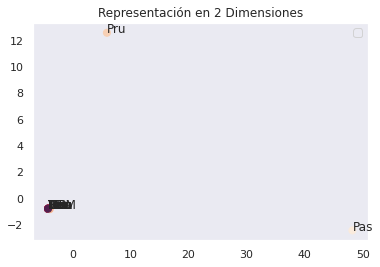

In [ ]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 

plt.axis('tight')
plt.legend()
plt.title("Representación en 2 Dimensiones")
plt.grid()
plt.show()

## Análisis por DBSCAN



Vamos a identificar características outliers mediante la utilización de DBSCAN.

### Parametrización


Vamos a fijar MinPts = 2 y observar que epsilon podemos establecer


No handles with labels found to put in legend.


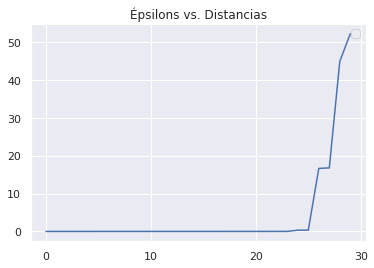

In [ ]:
minPts=2
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(features_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(features_norm):
    for j in range(len(features_norm)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 120, 10))
ax.set_yticks(np.arange(0, 60, 10))

plt.plot(seq)


plt.axis('tight')
plt.legend()
plt.title("Épsilons vs. Distancias")
plt.show()

Vamos a establecer un rango de pruebas para aislar elementos diferentes a los demás. 

### Ejecución

In [ ]:
from sklearn.cluster import DBSCAN

for eps in np.arange(1, 5, 0.5):
  db = DBSCAN(eps, min_samples=minPts).fit(features_norm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  
#labels

  1.00, 1, 2
  1.50, 1, 2
  2.00, 1, 2
  2.50, 1, 2
  3.00, 1, 2
  3.50, 1, 2
  4.00, 1, 2
  4.50, 1, 2


In [ ]:
db = DBSCAN(eps=1, min_samples=minPts).fit(features_norm)
labels = db.labels_
labels

NameError: ignored

Visualizamos los resultados, obteniendo las mismas dos características distintas encontradas con el análisis de clustering jerárquico.

No handles with labels found to put in legend.


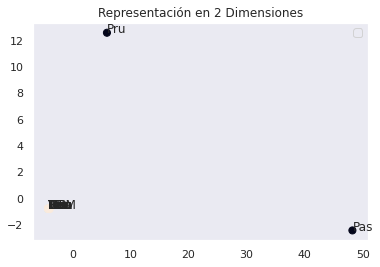

In [ ]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 

plt.axis('tight')
plt.legend()
plt.title("Representación en 2 Dimensiones")
plt.grid()
plt.show()

Marcamos los utliers

In [ ]:
covid_feat['dbscan_group'] = labels

covid_feat[covid_feat['dbscan_group'] == -1]


NameError: ignored